In [20]:
import numpy as np
# 画图
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time
import math
# 统计
from scipy import stats
import scipy.optimize as opt
from scipy.stats import norm, poisson
from scipy.optimize import leastsq
# 解决中文乱码问题
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

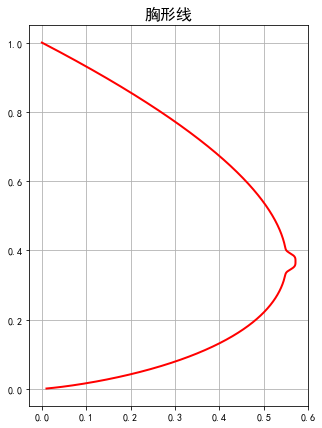

In [33]:
# 胸线图
x = np.arange(1, 0, -0.001)
# log -> 对数
# exp -> 指数
y = (-3 * x * np.log(x) + np.exp(-(40 * (x - 1 / np.e)) ** 4) / 25) / 2
# 设置尺寸和背景
plt.figure(figsize=(5, 7), facecolor='w')
plt.plot(y, x, 'r-', linewidth=2)
# 网格
plt.grid(True)
plt.title(u'胸形线', fontsize=16)
plt.show()

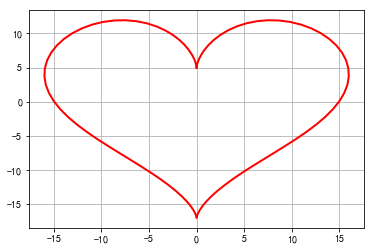

In [57]:
# 心形图
t = np.linspace(0, 2 * np.pi, 100)
x = 16 * np.sin(t) ** 3
y = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)
plt.plot(x, y, 'r-', linewidth=2)
# plt.plot(x, 'r--', linewidth=3)
# plt.plot(y, 'r.', linewidth=3)
plt.grid(True)
plt.show()

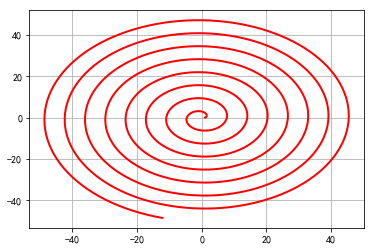

In [64]:
# 渐开线
t = np.linspace(0, 50, 1000)
x = t * np.sin(t) + np.cos(t)
y = np.sin(t) - t * np.cos(t)
plt.plot(x, y, 'r-', linewidth=2)
plt.grid()
plt.show()

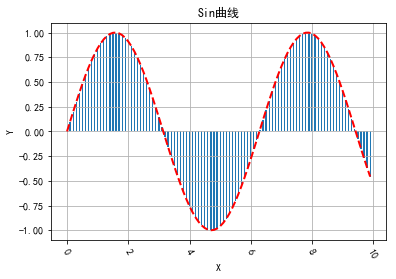

In [67]:
# Bar
x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.bar(x, y, width=0.04, linewidth=0.2)
plt.plot(x, y, 'r--', linewidth=2)
plt.title(u'Sin曲线')
plt.xticks(rotation = -60)
# 坐标
plt.xlabel('X')
plt.ylabel('Y')
# 格子
plt.grid()
plt.show()

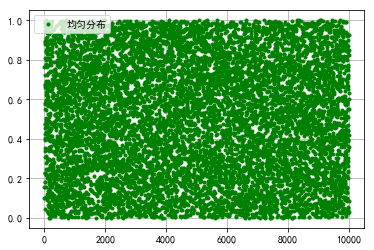

In [76]:
# 概率分布
# 10000 个 样本，包含 0 不包含 1
x = np.random.rand(10000)
t = np.arange(len(x))
# 直方图  30份 0.5的透明度
# plt.hist(x, 30, color='m', alpha=0.5, label=u'均匀分布')
# plt.plot(t, x, 'r-', label=u'均匀分布')
plt.plot(t, x, 'g.', label=u'均匀分布')
plt.legend(loc='upper left')
plt.grid()
plt.show()

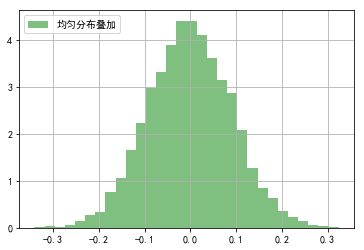

In [78]:
# 验证中心极限定理 -> 高斯函数图像
t = 1000
# 全零矩阵
a = np.zeros(10000)
for i in range(t):
    # 从 -5 到 5 做均匀分布
    a += np.random.uniform(-5, 5, 10000)
a /= t    
plt.hist(a, bins=30, color='g', alpha=0.5, normed=True, label=u'均匀分布叠加')
# 标签放在左上方
plt.legend(loc='upper left')
plt.grid()
plt.show()

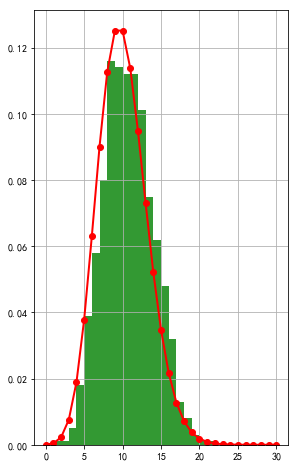

In [84]:
# 其他分布的中心极限定理
lamda = 10
# 模型
p = stats.poisson(lamda)
# 离散随机值采样 -> 满足lamda = 10
y = p.rvs(size = 1000)
mx = 30
r = (0, mx)
bins = r[1] - r[0]
plt.figure(figsize=(10, 8), facecolor='w')
# 1 行 2 列 现在画第 1 个图
plt.subplot(121)
# range -> 范围
# 采样的得到的质量函数
plt.hist(y, bins=bins, range=r, color='g', alpha=0.8, normed=True)
t = np.arange(0, mx + 1)
# pmf -> 概率质量函数
plt.plot(t, p.pmf(t), 'ro-', lw=2)
plt.grid(True)
plt.show()

[7 7 5 ..., 3 7 5]


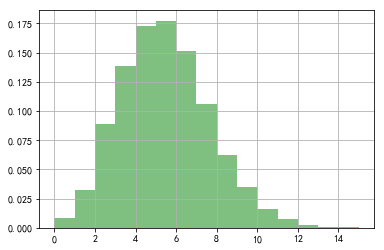

(array([ 0.00810081,  0.0320032 ,  0.08870887,  0.13851385,  0.17291729,
        0.17731773,  0.15161516,  0.10611061,  0.06250625,  0.03460346,
        0.01590159,  0.00730073,  0.00280028,  0.00110011,  0.00050005]), array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.]), <a list of 15 Patch objects>)
1.0


In [8]:
# Poission 分布
x = np.random.poisson(lam=5, size=10000)
print(x)
pillar = 15
a = plt.hist(x, bins=pillar, normed=True, range=[0, pillar], color='g', alpha=0.5)
plt.grid()
plt.show()
print(a)
# 求和
print(a[0].sum())

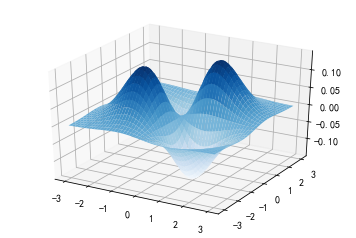

In [30]:
# 绘制三维图像
# -3 到 3 取 100个  j -> 个数
# x => 行， y => 列
# mgrid => 行列
# x, y = np.ogrid[-3:3:100j, -3:3:100j]

# meshgrid => 行列
a = np.linspace(-3, 3, 101)
# print(a)
x, y = np.meshgrid(a, a)
# print(x)
# print(y)

# u = np.linspace(-3, 3, 101)
# x, y = np.meshgrid(u, u)
# 二元正态分布
# math.sqrt -> 平方根
# z = np.exp(-(x ** 2 + y ** 2) / 2) / math.sqrt(2 * math.pi)

z = x * y * np.exp(-(x ** 2 + y ** 2) / 2) / math.sqrt(2 * math.pi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot_suface(x, y, z,  cmap=cm.coolwarm, linewidth=0.1)
# rstride -> 行，cstride -> 列， cmap -> 颜色
ax.plot_surface(x, y, z, rstride=3, cstride=2, cmap=cm.Blues, linewidth=0.5)
plt.show()